<a href="https://colab.research.google.com/github/samy387/Arabian/blob/main/Copy_of_Copy_of_Task1_done_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
null = df.isnull().sum()
ratio  = null /df.shape[0]
n_unique = df.nunique()

In [ ]:
info = pd.DataFrame({'null':null,'ratio':ratio,'n_unique':n_unique})
info.T

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n_unique,569.0,2.0,456.0,479.0,522.0,539.0,474.0,537.0,537.0,542.0,...,457.0,511.0,514.0,544.0,411.0,529.0,539.0,492.0,500.0,535.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
numerical_columns = df.select_dtypes('number').columns
continous_colums = []
for colum in numerical_columns:
  if df[colum].nunique() > 10:
    continous_colums.append(colum)

In [ ]:
len(continous_colums)

31

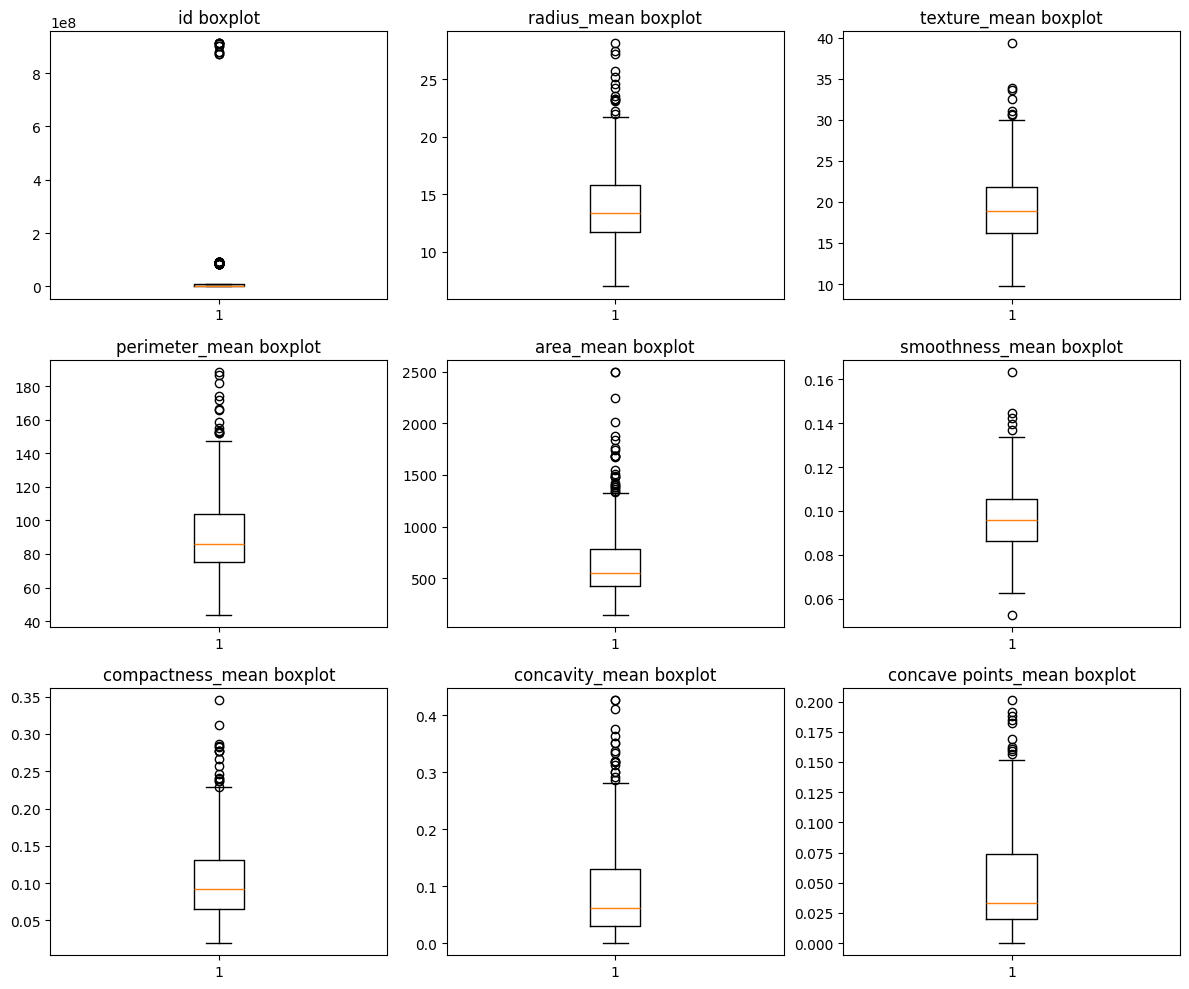

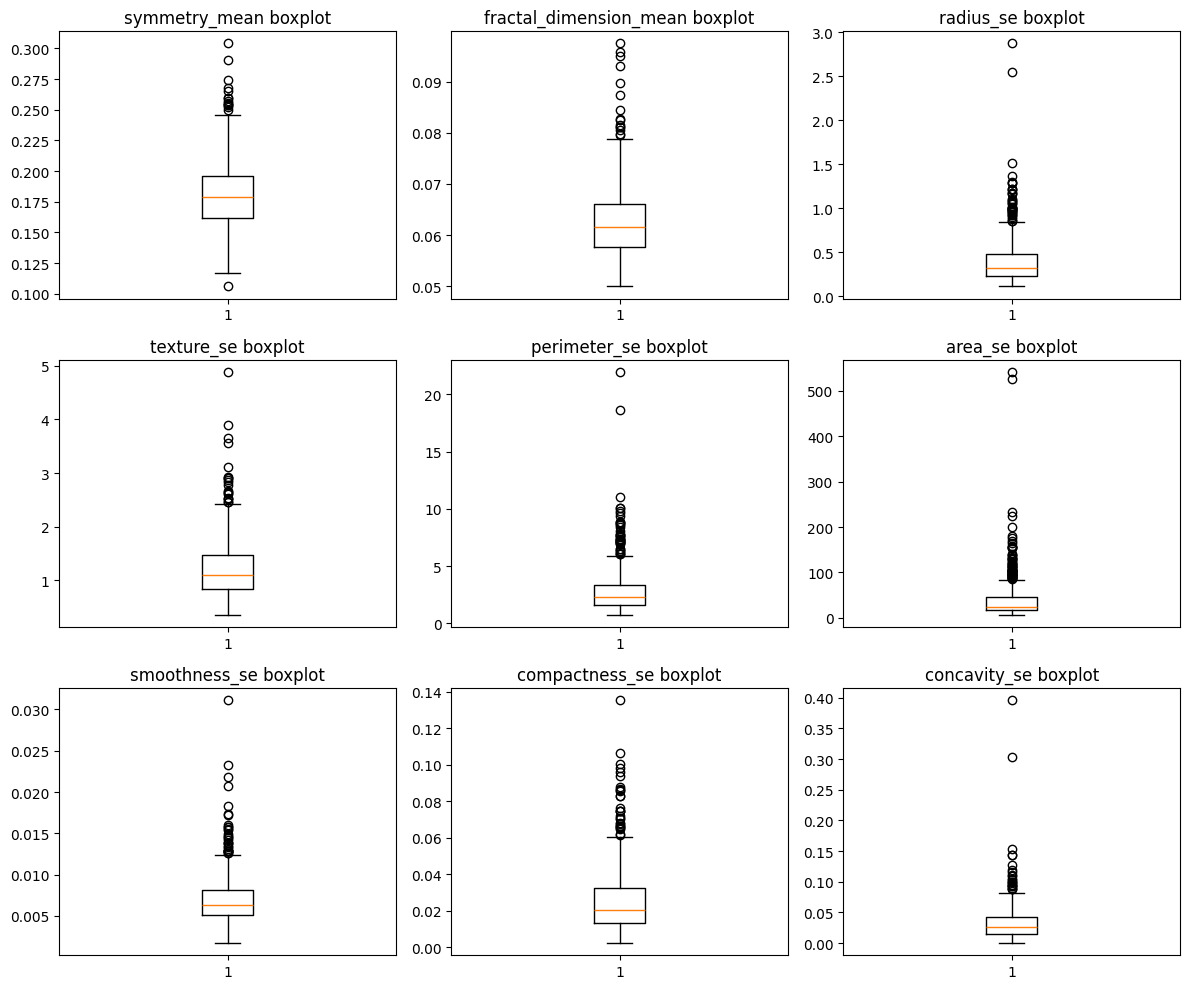

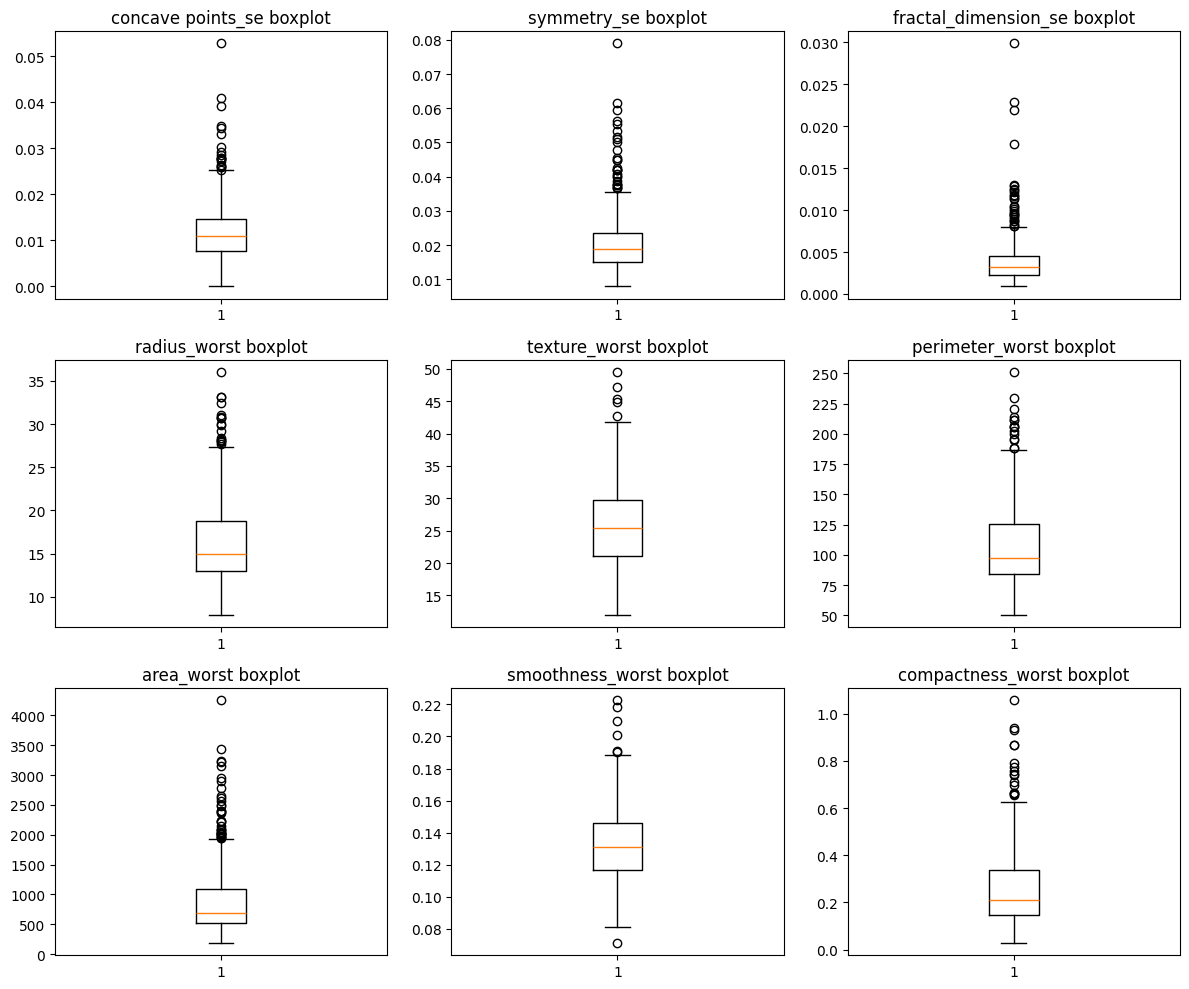

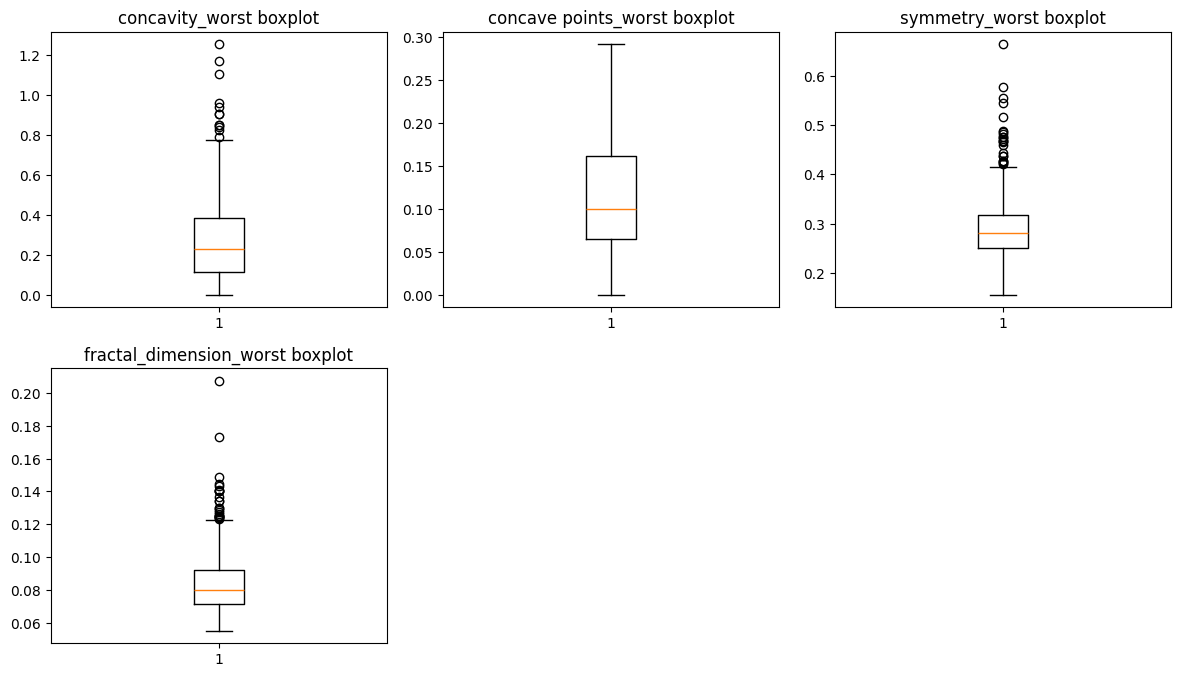

In [ ]:
n_rows = 3
n_cols = 3
n_plots_per_figure = n_rows * n_cols

for i in range(0, len(continous_colums), n_plots_per_figure):
    plt.figure(figsize=(12, 10))
    current_columns = continous_colums[i:i + n_plots_per_figure]

    for j, col in enumerate(current_columns):
        plt.subplot(n_rows, n_cols, j + 1)
        plt.boxplot(df[col])
        plt.title(f"{col} boxplot")

    plt.tight_layout()
    plt.show()

In [ ]:
pct = []
for col in continous_colums:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_fence = Q3 + (1.5 * IQR)
  lower_fence = Q1 - (1.5 * IQR)
  upper_outliers = df[df[col] > upper_fence][col].values
  lower_outliers = df[df[col] < lower_fence][col].values
  number_outliers = len(upper_outliers) + len(lower_outliers)
  pct.append(number_outliers / df.shape[0])
  df[col].replace([upper_outliers, lower_outliers],[upper_fence , lower_fence],inplace=True)

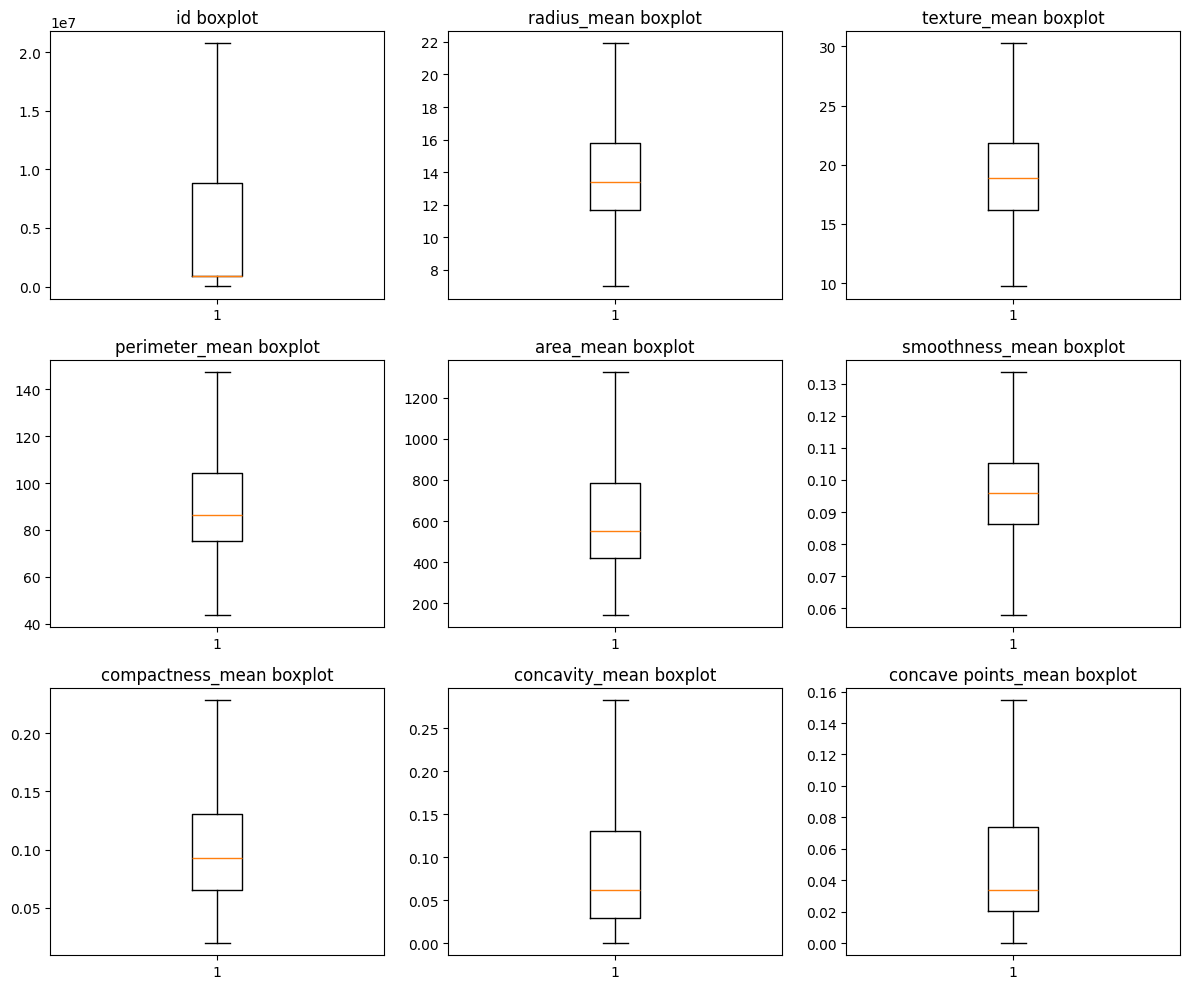

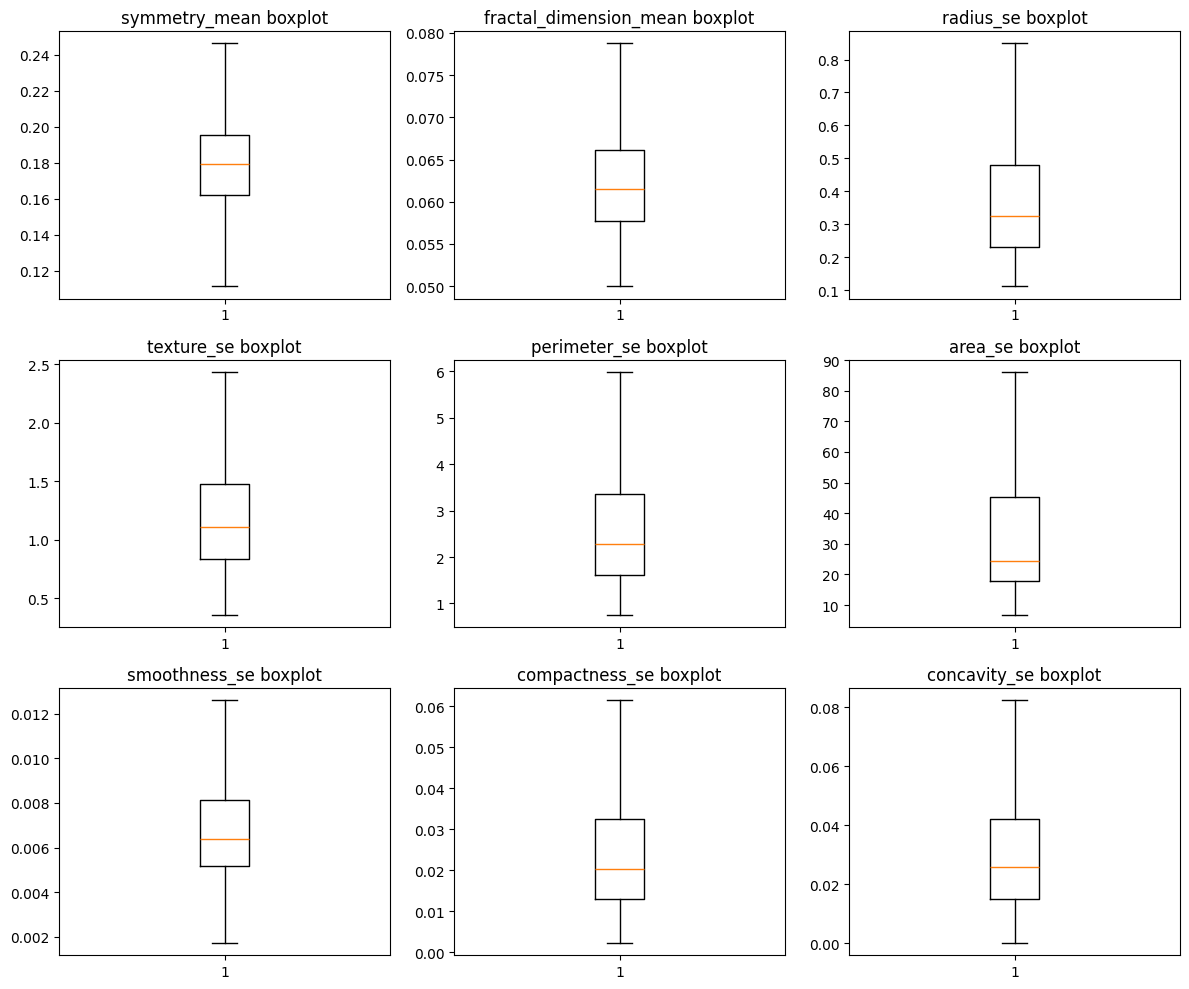

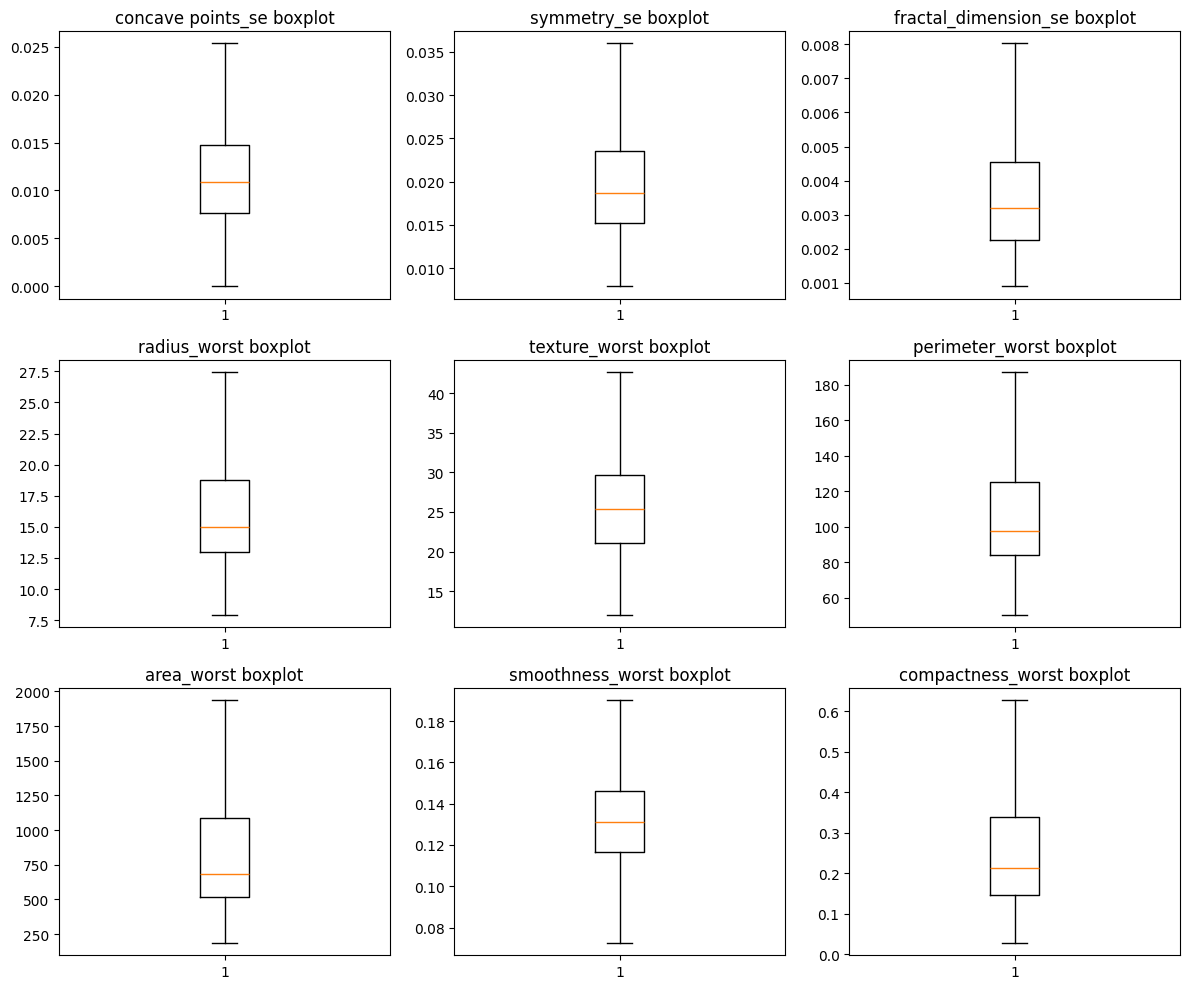

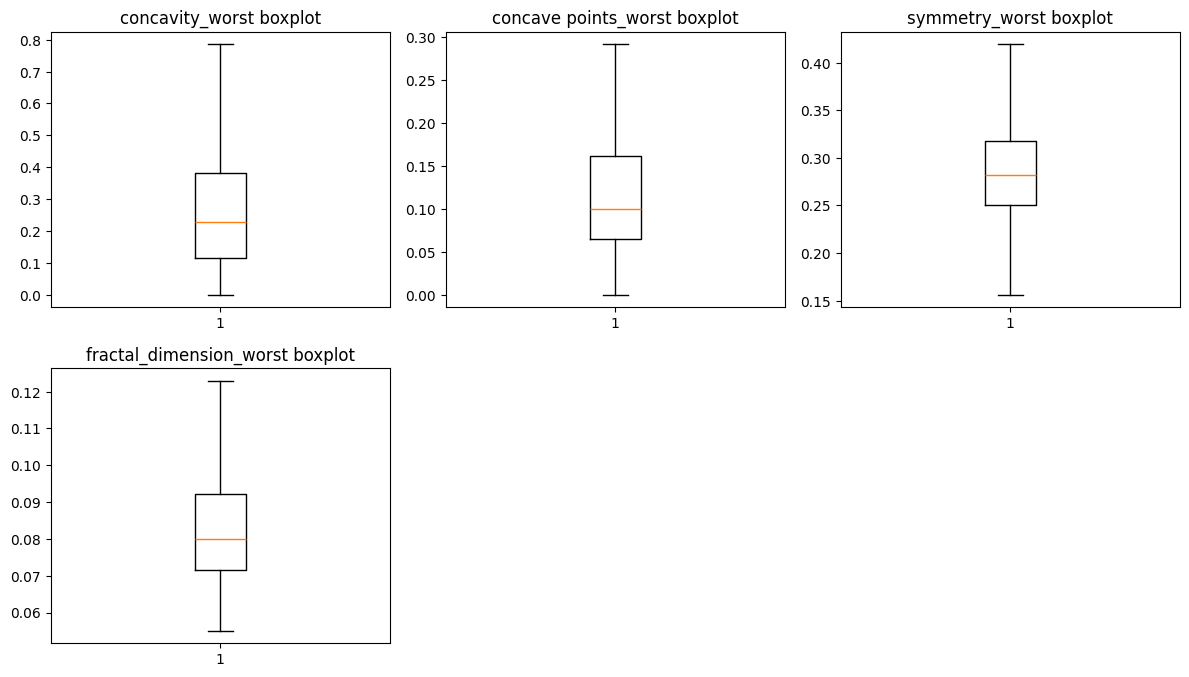

In [ ]:
n_rows = 3
n_cols = 3
n_plots_per_figure = n_rows * n_cols

for i in range(0, len(continous_colums), n_plots_per_figure):
    plt.figure(figsize=(12, 10))
    current_columns = continous_colums[i:i + n_plots_per_figure]

    for j, col in enumerate(current_columns):
        plt.subplot(n_rows, n_cols, j + 1)
        plt.boxplot(df[col])
        plt.title(f"{col} boxplot")

    plt.tight_layout()
    plt.show()

In [ ]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f" Scaled Training Features shape: {X_train_scaled.shape}")
print(f" Scaled Testing Features shape: {X_test_scaled.shape}")

 Scaled Training Features shape: (455, 30)
 Scaled Testing Features shape: (114, 30)


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train_encoded)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train_encoded)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_encoded)
y_pred_linear = linear_model.predict(X_test_scaled)

# Logistic Regression (for classification)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_encoded)
y_pred_logistic_encoded = logistic_model.predict(X_test_scaled)

# Decode the predicted labels for Logistic Regression for evaluation
y_pred_logistic = label_encoder.inverse_transform(y_pred_logistic_encoded)


# Evaluate Logistic Regression (classification model)
accuracy_log = accuracy_score(y_test, y_pred_logistic)
precision_log = precision_score(y_test, y_pred_logistic, pos_label='M') # Assuming 'M' is the positive class
recall_log = recall_score(y_test, y_pred_logistic, pos_label='M')
f1_log = f1_score(y_test, y_pred_logistic, pos_label='M')
conf_matrix_log = confusion_matrix(y_test, y_pred_logistic)

print(f"  Accuracy: {accuracy_log:.4f}")
print(f"  Precision: {precision_log:.4f}")
print(f"  Recall: {recall_log:.4f}")
print(f"  F1-score: {f1_log:.4f}")
print("  Confusion Matrix:")
print(conf_matrix_log)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test_encoded, y_pred_ridge) # Use encoded test labels for regression metrics
r2_ridge = r2_score(y_test_encoded, y_pred_ridge)
print(f"  Ridge Regression:")
print(f"    Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"    R-squared (R2): {r2_ridge:.4f}")

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test_encoded, y_pred_lasso) # Use encoded test labels for regression metrics
r2_lasso = r2_score(y_test_encoded, y_pred_lasso)
print(f"  Lasso Regression:")
print(f"    Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"    R-squared (R2): {r2_lasso:.4f}")

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test_encoded, y_pred_linear) # Use encoded test labels for regression metrics
r2_linear = r2_score(y_test_encoded, y_pred_linear)
print(f"  Linear Regression:")
print(f"    Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"    R-squared (R2): {r2_linear:.4f}")

  Accuracy: 0.9825
  Precision: 1.0000
  Recall: 0.9535
  F1-score: 0.9762
  Confusion Matrix:
[[71  0]
 [ 2 41]]
  Ridge Regression:
    Mean Squared Error (MSE): 0.0563
    R-squared (R2): 0.7604
  Lasso Regression:
    Mean Squared Error (MSE): 0.2350
    R-squared (R2): -0.0001
  Linear Regression:
    Mean Squared Error (MSE): 0.0596
    R-squared (R2): 0.7463


Ridge Regression is the best model because:
It has the lowest MSE (0.0563), indicating the smallest prediction errors.
It has the highest R² (0.7604), meaning it explains the most variance in the target variable.
The regularization in Ridge Regression likely helps handle multicollinearity in the breast cancer dataset, where features (e.g., radius_mean, perimeter_mean, area_mean) are often highly correlated.
Why Ridge Regression?
Robustness: Ridge Regression’s L2 regularization reduces the impact of multicollinearity, which is common in the breast cancer dataset due to related features (e.g., radius, perimeter, and area).
Performance: Its lower MSE and higher R² indicate better predictive accuracy and explanatory power compared to Linear and Lasso Regression.
Generalization: Regularization helps prevent overfitting, making Ridge Regression more reliable for unseen data.

The best model is Ridge Regression because it achieves the lowest Mean Squared Error (0.0563) and the highest R-squared (0.7604), indicating superior predictive accuracy and explanatory power. These metrics show that Ridge Regression makes the smallest errors in predictions and explains approximately 76% of the variance in the target variable, outperforming Lasso Regression (MSE: 0.2350, R²: -0.0001) and Linear Regression (MSE: 0.0596, R²: 0.7463). The regularization in Ridge Regression likely helps it handle correlated features in the dataset effectively.
